# Custom data training

## 학습데이터 디렉토리 구조

- train/validation/test 데이터셋 디렉토리를 각각 생성한다.
- images 폴더에 이미지 파일을, labels 폴더에 annotation 파일들을 저장한다.
    - annotation 파일은 대상 image 파일과 이름이 같아야 하고 확장자는 txt로 한다.

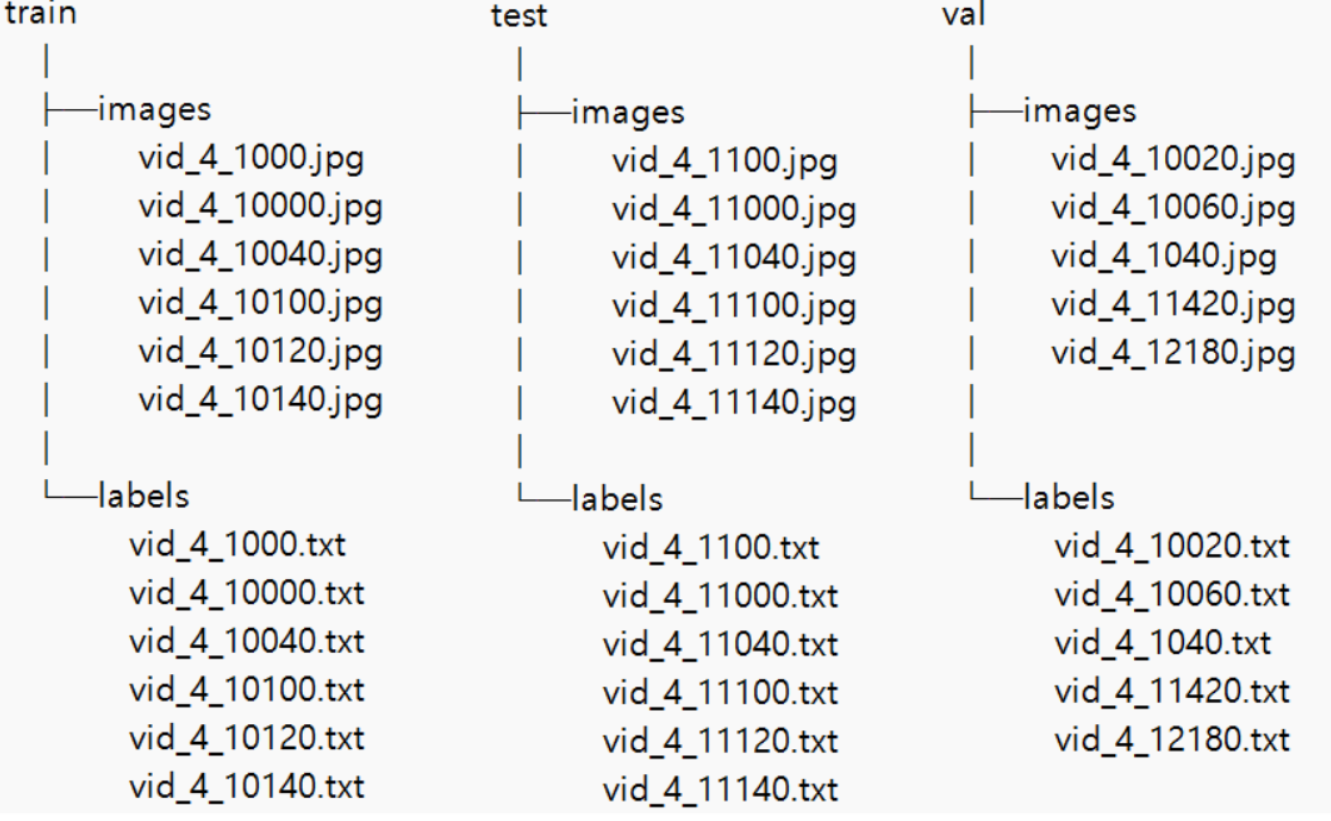

- YOLO object detection annotation 파일 형식
    - 공백을 구분자로 하는 csv 파일 형식
    - 한줄에 한개 object의 정보를 작성한다.
    - `label center_x, center_y, bbox_width, bbox_height`  
        - bbox 위치정보는 image의 size 에 대한 비율로 정의한다.
        - 예)
            ```
            0.0    0.329934450147929     0.5672360751315789    0.25200291331360947   0.15803108815789477
            0.0    0.8026219956360947    0.5186609456578948    0.0975965039940829    0.08419689131578946
            ```
        

## 학습 설정 yaml 파일 작성
- 다음 항목들을 작성한다.
    - train: train dataset 저장경로
    - test: test dataset 저장경로
    - val: validation dataset 저장경로
        - train/test/validation 저장경로는 절대경로로 작성한다.
    - nc: class 개수
    - names: class name    
        ```yaml
        train: C:\datasets\train
        test: C:\datasets\test
        val: C:\datasets\val
        nc: 2
        names: ["car", "bus"]
        ```
        
> yaml: https://yaml.org/

## Training 하기 
### CLI

<b style='font-size:1.3em'>1.  학습시작</b>    
```bash
yolo detect train data=custom_data.yaml model=yolov8n.pt epochs=100 imgsz=640
```
- model: train 지정
- data: 학습관련 설정 파일 경로로 다음을 설정한다.
    - train/test/validation dataset 저장경로
    - class 개수
    - class name
- model: fine tuning 시 시작 Pretrained Model 파일 경로
- args
    - epochs: 반복횟수
    - imgsz: input image size
    - https://docs.ultralytics.com/cfg/
    
<b style='font-size:1.3em'>2. 이어서 학습하기</b>    
```bash
yolo detect train resume model=last.pt
```
- model: 마지막으로 저장된 파일 경로

### Python

1. YOLO객체 생성
    - Fine tuning할 경우 pretrained 모델파일 저장 경로를 지정한다.
    - 새로 학습할 경우 모델구조를 정의한 yaml 설정파일 저장 경로를 지정한다.
2. train
    - train 설정 yaml 파일의 위치와 train을 위한 정보들을 매개변수로 전달한다.

## Dataset 다운 및 복사

- https://universe.roboflow.com/bohni-tech/fruits-and-vegi/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!curl -L "https://universe.roboflow.com/ds/zeboj2RMLi?key=8NoMSoXc2m" > roboflow.zip 

In [ ]:
from zipfile import ZipFile

with ZipFile("roboflow.zip") as zf:
    zf.extractall("data")

# 과일, 야채 image detection

In [2]:
fruits = ['Apple', 'Banana', 'Beetroot', 'Bitter_Gourd', 'Bottle_Gourd', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cherry', 'Chilli', 'Coconut', 'Cucumber', 
          'EggPlant', 'Ginger', 'Grape', 'Green_Orange', 'Kiwi', 'Maize', 'Mango', 'Melon', 'Okra', 'Onion', 'Orange', 'Peach', 'Pear', 'Peas',
          'Pineapple', 'Pomegranate', 'Potato', 'Radish', 'Strawberry', 'Tomato', 'Turnip', 'Watermelon']
print(len(fruits))

35


## yaml 설정파일 작성

In [1]:
# !pip install pyyaml

In [18]:
# python: dictionary <-----> yaml
# 출력할 데이터를 dictionary로 구성
import yaml
import os

data = {
    "train":r"/content/data/train", 
    "val":r"/content/data/valid",
    "test":r"/content/data/test",
    "nc":35, 
    "names":fruits    
}
os.makedirs("data", exist_ok=True)# 저장할 디렉토리 생성

with open('data/custom_data.yaml', 'wt') as fw:
    yaml.dump(data, fw)

In [19]:
with open('data/custom_data.yaml', 'rt') as fr:
    d = yaml.safe_load(fr)
    print(type(d))
    print(d)

<class 'dict'>
{'names': ['Apple', 'Banana', 'Beetroot', 'Bitter_Gourd', 'Bottle_Gourd', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cherry', 'Chilli', 'Coconut', 'Cucumber', 'EggPlant', 'Ginger', 'Grape', 'Green_Orange', 'Kiwi', 'Maize', 'Mango', 'Melon', 'Okra', 'Onion', 'Orange', 'Peach', 'Pear', 'Peas', 'Pineapple', 'Pomegranate', 'Potato', 'Radish', 'Strawberry', 'Tomato', 'Turnip', 'Watermelon'], 'nc': 35, 'test': 'C:/Users/Playdata/Downloads/Playdata_/08_computervision/실습/data//test', 'train': 'C:/Users/Playdata/Downloads/Playdata_/08_computervision/실습/data/train', 'val': 'C:/Users/Playdata/Downloads/Playdata_/08_computervision/실습/data//valid'}


## 학습

In [20]:
# yolov8 설치
# !pip install ultralytics

In [22]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
# 학습 - train()메소드 호출
model.train(data='data/custom_data.yaml', 
            epochs=1,   # 200
            patience=20, # 지정한 epoch만큼 성능이 개선이 안되면 조기종료.
            batch=16, #batch size
            imgsz=640, #input image size 
            optimizer='Adam'
            )

Ultralytics YOLOv8.1.13 🚀 Python-3.10.13 torch-2.2.0+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/Playdata/Downloads/Playdata_/08_computervision/실습/data/custom_data.yaml, epochs=1, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sa

RuntimeError: Dataset 'C://Users/Playdata/Downloads/Playdata_/08_computervision//data/custom_data.yaml' error  
Dataset 'C://Users/Playdata/Downloads/Playdata_/08_computervision//data/custom_data.yaml' images not found , missing path 'C:\Users\Playdata\Downloads\Playdata_\08_computervision\\data\valid'
Note dataset download directory is 'C:\Users\Playdata\datasets'. You can update this in 'C:\Users\Playdata\AppData\Roaming\Ultralytics\settings.yaml'

- <b style='font-size:1.5em'>결과</b>
```bash
Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    100/100      39.5G     0.7396     0.5254      1.153         98        640: 100%|██████████| 137/137 [01:04<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.05s/it]
                   all        147        613      0.768      0.846      0.877      0.652

100 epochs completed in 3.049 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 52.0MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.0.50 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 218 layers, 25860025 parameters, 0 gradients, 78.8 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  3.00s/it]
                   all        147        613      0.803      0.826      0.876      0.652
                 Apple        147         22      0.806      0.864      0.897      0.772
                Banana        147          7      0.777      0.857      0.917      0.582
          Bitter_Gourd        147          4      0.683       0.25      0.351      0.125
               Cabbage        147         38       0.85      0.896      0.953      0.731
                Carrot        147          9          1      0.967      0.995      0.531
                Cherry        147          2      0.814          1      0.995      0.895
               Coconut        147          1      0.379          1      0.995      0.995
              Cucumber        147         13      0.901      0.846       0.86      0.648
                Ginger        147         14      0.902      0.929      0.952      0.592
                 Grape        147          6       0.85          1      0.995      0.752
          Green_Orange        147         12      0.894          1      0.995      0.913
                  Kiwi        147         13      0.681      0.988      0.936      0.702
                 Mango        147         33      0.966      0.879      0.964      0.749
                 Melon        147         31      0.845      0.529      0.709      0.394
                  Okra        147          2      0.921        0.5      0.502      0.301
                 Onion        147         15      0.798      0.867      0.938      0.618
                Orange        147         14      0.933      0.857      0.932      0.805
                 Peach        147         16      0.941      0.688      0.904      0.748
                  Pear        147          9       0.93          1      0.995      0.798
                  Peas        147          1      0.408          1      0.995      0.895
             Pineapple        147         30      0.844      0.733      0.812      0.463
           Pomegranate        147         18      0.928          1      0.995      0.836
                Potato        147        208      0.767      0.659      0.764      0.419
            Strawberry        147         19      0.937          1      0.995      0.807
                Tomato        147         50      0.796       0.74       0.88      0.583
                Turnip        147          3      0.297      0.333       0.45      0.203
            Watermelon        147         23      0.829      0.913      0.973      0.738
Speed: 1.3ms preprocess, 1.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train3
```


## 평가
- YOLO객체 생성시 저장된 모델파일 경로를 넣어 생성한다.
    - 학습할때 사용한 yaml파일 학습때와 동일한 경로에 있어야 한다.
    - train/validation/test 데이터셋이 yaml에 등록된 경로에 있어야 한다.
- `YOLO.val()` 이용
    - DetMetrics 타입 객체에 결과를 담아 반환

In [ ]:
!pip install --upgrade down

In [ ]:
!gdown https://drive.google.com/uc?id=1-56b8-5DzN5l8wnJdU7eUORcPt4_Arac

In [ ]:
from zipfile import ZipFile

with ZipFile("/content/custom_data_train_result_epoch_123.zip") as zf:
    zf.extractall("models")

In [17]:
# best_model_path = '/content/models/runs/detect/train/weights/best.pt'
best_model_path = 'runs/detect/train/weights/best.pt'

best_model = YOLO(best_model_path)

metrics = best_model.val()

Ultralytics YOLOv8.1.13 🚀 Python-3.10.13 torch-2.2.0+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
Model summary (fused): 218 layers, 25860025 parameters, 0 gradients, 78.8 GFLOPs


FileNotFoundError: '/content/data/custom_train.yaml' does not exist

In [ ]:
print(metrics.box.map)  # map50-95

In [ ]:
print(metrics.box.map50)

In [ ]:
print(metrics.box.map75)

In [ ]:
print(metrics.box.maps) # 클래스별 ap score를 확인

In [ ]:
for label, ap in zip(fruits, metrics.box.maps):
    print(label, ":", ap)

# 추론

In [ ]:
from ultralytics import YOLO

yolo = YOLO('runs/detect/train3/weights/best.pt')
result = yolo("01_test_image_detection/fruits", save=True)